# Predicting heart disease using machine learning

This notebook looks into using various python-based machin learning and data science libraries in a attempt to build a machine learning model capable of prediciting whether or not someone has heart disease based on their health conditon

We are going to look at following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1 . Problem Definition
In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2 . Data
The original data came from Cleavland data from the UCI machine learning repository , there is also a verision of this available on kaggle.

## 3 . Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

## 4 . Features
Here we will get different information about each of the data

**Create Data Dictionary**


* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
   -- Value 0: typical angina
   -- Value 1: atypical angina
   -- Value 2: non-anginal pain
   -- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
   -- Value 0: normal
   -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
   -- Value 0: upsloping
   -- Value 1: flat
   -- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
   and the label
* condition: 0 = no disease, 1 = disease

### Preparing the tools
 pandas, matplotlib , numpy for data analysis and manipulation
 
 


In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows , columns)

(303, 14)

# Data exploration (EDA)

Goal here is to find more about the data and become a subject expert on the dataset you're working with
 
 1. What question(s) are you trying to solve.
 2. What kind of data do we have and how do we treat different types?
 3. What's missing from the data and how do you deal with it.
 4. what are the outliers and why should you care about them 
 5. How can you add, change or remove features to get more out of your data.
 

In [4]:
# let's find out how many of different class there are:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

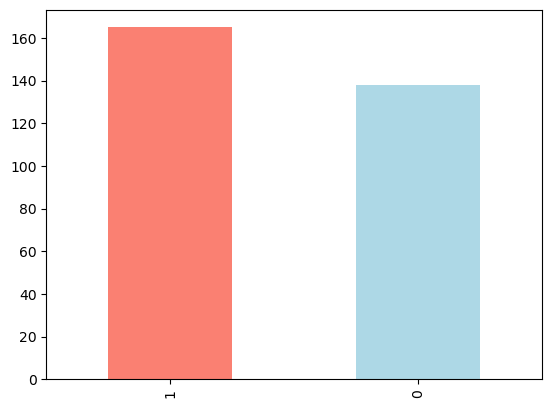

In [5]:
df["target"].value_counts().plot(kind="bar" , color =["salmon", "lightblue"]);
# 1 means have heart disease
# 2 means no heart disease

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df["sex"] , df["target"])

target,0,1
sex,,
0,24,72
1,114,93


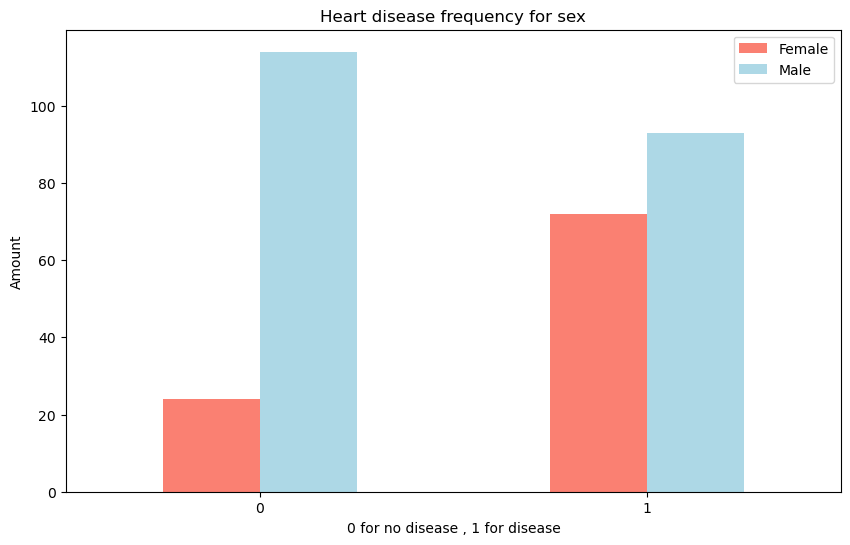

In [11]:
#Create a plot of crosstab
pd.crosstab(df.target , df.sex).plot(kind="bar",
                                     figsize=(10,6),
                                     color=["salmon", "lightblue"])

plt.title("Heart disease frequency for sex")
plt.xlabel("0 for no disease , 1 for disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0); # it changes the x label rotation

## Age vs max heart rate

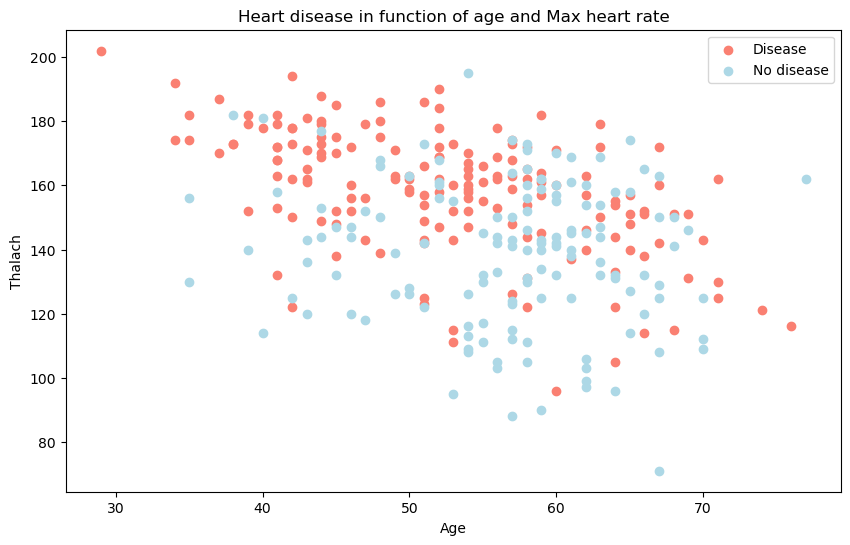

In [12]:
# Create another fig
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1], # here taking only those ages where target is 1
            df.thalach[df.target==1], # here taking only those heart rates where target is 1
            c = "salmon");

# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue");

# Add helpful info\
plt.title("Heart disease in function of age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No disease"]);

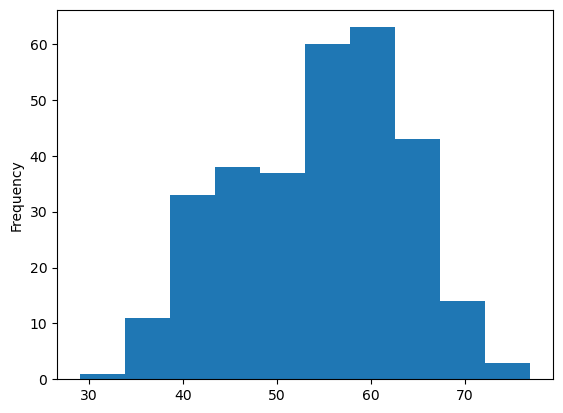

In [13]:
# Check distribution of age column with histogram
df.age.plot.hist();

## Heart disease frequency per chest pain type

cp: chest pain type -- 
*  0: typical angina -- CHest pain related decrease blood supply to the heart
*  1: atypical angina -- chest pain not related to heart
*  2: non-anginal pain -- (not heart related pain)
*  3: asymptomatic -- chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


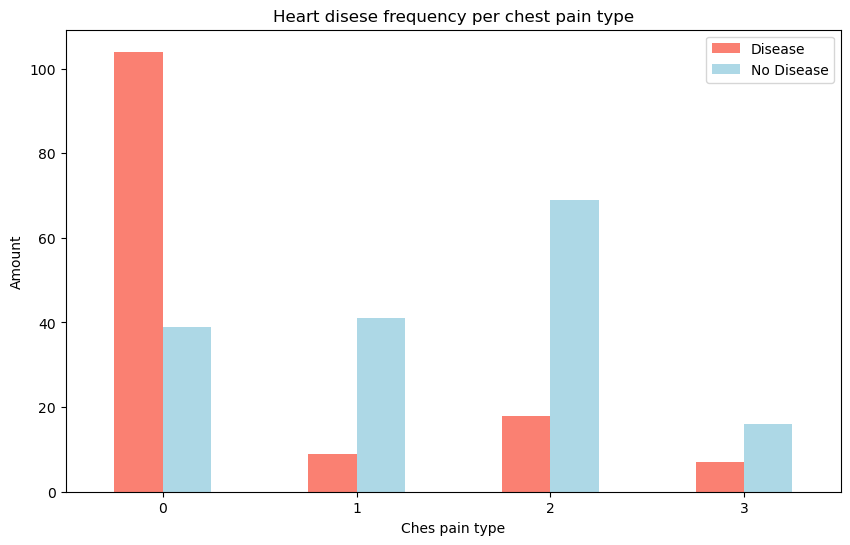

In [15]:
# Make the crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind="bar", color=["salmon", "lightblue"],
                                  figsize=(10,6))

# make it more communicative
plt.title("Heart disese frequency per chest pain type")
plt.xlabel("Ches pain type")
plt.ylabel("Amount")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation = 0);

In [16]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


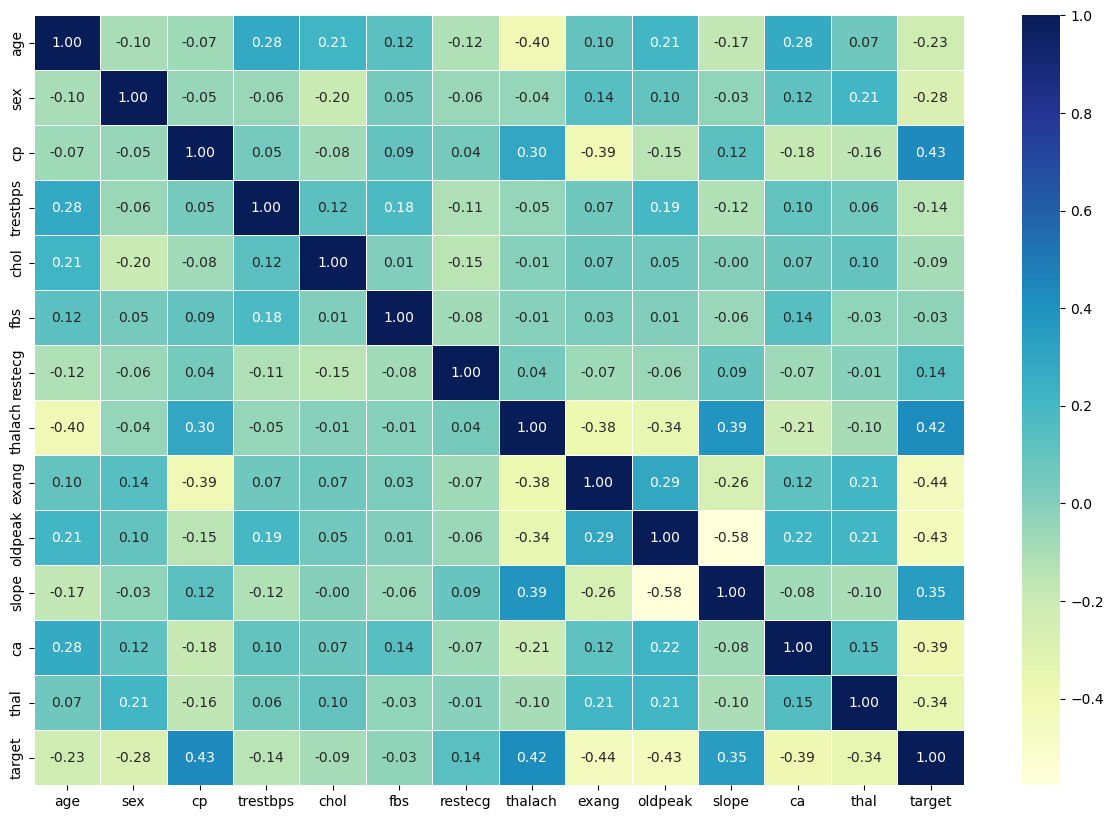

In [17]:
# Lets make our correlation matrix more visual
corr_matrix = df.corr()
fig ,ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix, annot=True,
                 linewidths=0.5,fmt=".2f",
                 cmap="YlGnBu");

In [18]:
# negative correlation means if one goes up then other goes down

### Modelling


In [19]:
# Split data into X and Y
X = df.drop("target", axis=1)
Y =df["target"]

In [20]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# Split data into train and test
np.random.seed(42)

#Split 

X_train, X_test , Y_train , Y_test = train_test_split(X, Y , test_size =0.2)

In [22]:
X_train


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


# Choosing the model
1 .Logistic Regression
2. K nearest_neighbors Classifier
3. Random Forest Classifier

In [37]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score a model.
def fit_and_score(models, X_train , X_test, Y_train , Y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models.
    X_train: training data(no labels)
    X_test : Testing data (no label)
    Y_train: training labels
    Y_test : test labels
    """
    
    # Set random seed 
    np.random.seed(42)
    
    # Make a dict to create models score
    
    model_score= {}
    
    # Loop through models
    for name, model in models.items():
        #Fit the model to data
        model.fit(X_train,Y_train)
        #Evaluate the model and append it's score to model_score
        model_score[name]= model.score(X_test, Y_test)
        
    return model_score

In [43]:
model_score =  fit_and_score(models=models ,X_train=X_train ,X_test=X_test, Y_train=Y_train ,Y_test=Y_test)

model_score

/Users/jatinprrrrt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model comparison



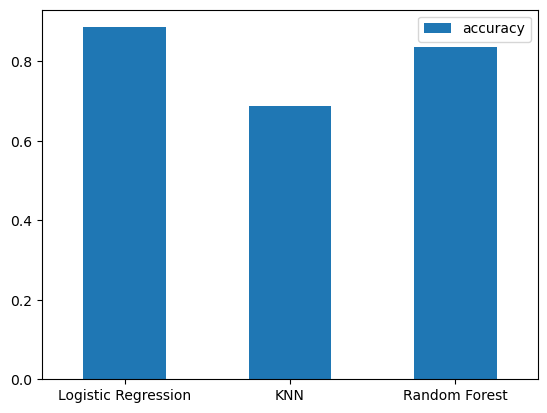

In [44]:
model_compare= pd.DataFrame(model_score ,index =["accuracy"])
model_compare.T.plot.bar();
plt.xticks(rotation=0);

In [45]:
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1-Score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter Tuning

In [52]:
## Let's tune KNN

train_scores = []
test_scores = []

# Create a list for different values of n_neighbors
neighbors = range(1,21)

# Instantiate KNN model
knn = KNeighborsClassifier()

#Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algortihm
    knn.fit(X_train , Y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,Y_train))
    
    # Update the test scores lisst
    test_scores.append(knn.score(X_test, Y_test))

Maximum KNN score on the test set is 75.41%, for 11


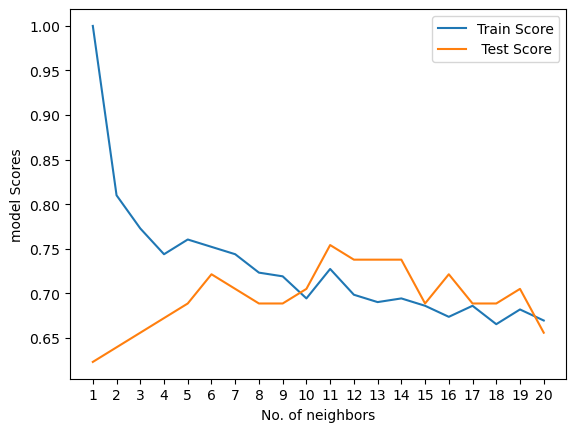

In [82]:
plt.plot(neighbors , train_scores , label="Train Score")
plt.plot(neighbors , test_scores,  label= " Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No. of neighbors")
plt.ylabel("model Scores")
plt.legend()


max_score = max(test_scores)
max_score_index = np.argmax(test_scores)
max_neighbors = neighbors[max_score_index]



print(f"Maximum KNN score on the test set is {max_score*100:.2f}%, for {max_neighbors}")

## Hyperparameter tuning with RandomizedSearchCV

In [84]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth": [None, 3,4,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we have got the hyperparameters grid nows lets the tune those models using these hyperparameters and randomizedSearchCv

In [85]:
# Tune logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random search hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, Y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [88]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [89]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

Now tuning RandomForestCLassifier

In [93]:
#Setup random seed
np.random.seed(42)

#Setup hyperparamter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True)

# Fit random search hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, Y_train )

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 4, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [94]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [95]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV

Since our logisticRegression model provides the best scores so far , we'll try and improve them again using GridSearchCV

In [111]:
# Different hyperparameters for our logistics Regressions
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogsiticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5, 
                          verbose = True)

# Fit  grid  hyperparameter search model
gs_log_reg.fit(X_train , Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [112]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [113]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

# Evaluating our tuned machine learning model beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision 
* Recall
* F1 Score

 and it would be great if cross validation is used wherever possible.

In [130]:
# Make predicitons with tuned model
y_preds =gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

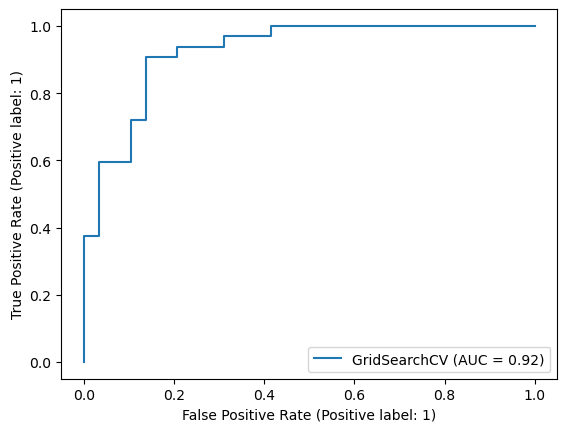

In [131]:
# Plot ROC Curve and calculate AUC score from estimator


RocCurveDisplay.from_estimator(gs_log_reg,X_test, Y_test)


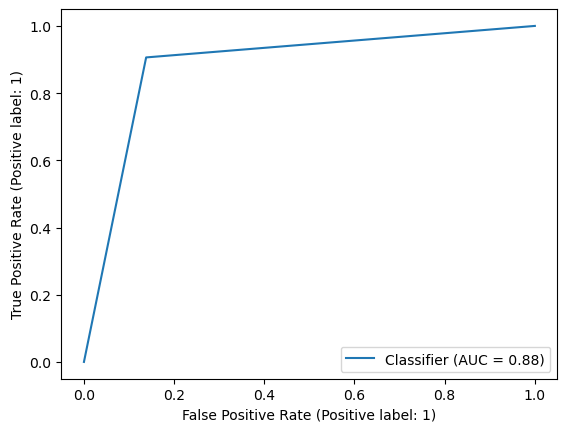

In [132]:
# Plot ROC curve and calculate AUC score from predictions
RocCurveDisplay.from_predictions(Y_test, y_preds);


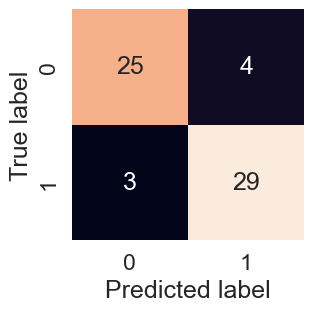

In [135]:
sns.set(font_scale=1.5)

def plot_conf_mat(Y_test, y_preds):
    
    """
    Plot's a nice looking confusion matrix using sns heatmap()
    """
    
    fig , ax =plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test,y_preds),
                     annot =True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
   
plot_conf_mat(Y_test, y_preds)
    
    

In [136]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculating evaluating metrics using cross-validation

calculat accuracy , precision , recall ,f1 score using cross-validation 

In [137]:
#Check best parameters

gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [138]:
# Instantiate model with best params

clf = LogisticRegression(C =0.23357214690901212,
                         solver = "liblinear")



In [149]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,X,Y,
                         cv = 5,
                         scoring="accuracy")
cv_acc.mean()

0.8479781420765027

In [152]:
#Cross validated Precision
cv_precision = cross_val_score(clf,X,Y,
                               cv=5,
                               scoring="precision")
cv_precision.mean()

0.8215873015873015

In [156]:
#Cross validated recall
cv_recall = cross_val_score(clf, X , Y,
                            cv=5,
                            scoring="recall")
cv_recall.mean()

0.9272727272727274

In [159]:
#Cross validated F1-score
cv_F1_score= cross_val_score(clf, X,Y,
                             cv=5, 
                             scoring="f1")
cv_F1_score.mean()

0.8705403543192143

### Feature Importance

feature importance is another way of asking "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find feature importance for our model LogisticRegression model

In [162]:
#fit an instance of LogisticRegression
clf = LogisticRegression(C=0.23357214690901212,
                         solver = "liblinear")

clf.fit(X_train, Y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [164]:
#check coef_

clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590907,
         0.47095114, -0.65165351, -0.699842  ]])

In [166]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0036992183633085857,
 'sex': -0.9042408474114028,
 'cp': 0.6747282820013463,
 'trestbps': -0.01161340415475584,
 'chol': -0.0017036448092066976,
 'fbs': 0.04787689082536315,
 'restecg': 0.33490184455843097,
 'thalach': 0.02472938514033986,
 'exang': -0.6312040052639052,
 'oldpeak': -0.5759090719885068,
 'slope': 0.4709511397091774,
 'ca': -0.6516535119713651,
 'thal': -0.6998419972478845}

<Axes: title={'center': 'feature importance'}>

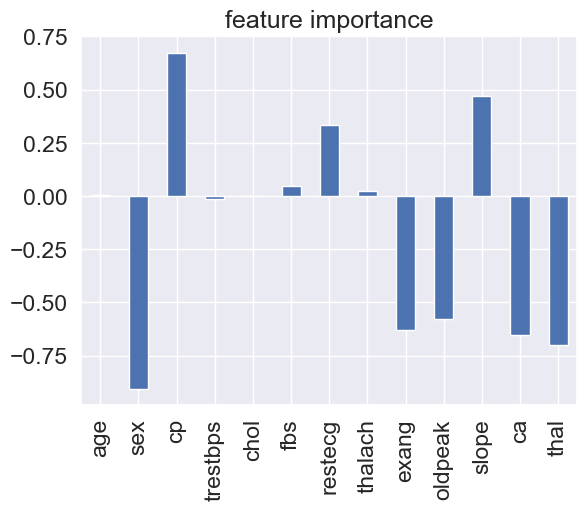

In [168]:
feature_df= pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",
                      legend=False)

### how can we improve our project
* using XGboost CatBoost
* tuning hyperparameters